In [2]:
% reset
from fisherfaces import FisherFaces
import os
from math import *
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from classifiers.lda import *
from classifiers.knn import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
root = 'orl_faces'
X, y = load_faces(root)
X_train = X[0:400:2,:]
X_test = X[1:400:2,:]
y_train = y[0:400:2]
y_test = y[1:400:2]

In [4]:
ff = FisherFaces()
classes = 40
U = ff.train(X_train, y_train, classes, verbose=True, load_path='fisherfaces')


calculating pca projection matrix
160
(10304,) (10304, 160)
eighen values: 
 [  2.84890474e+06   2.00339416e+06   1.15163138e+06 ...,   1.12719182e-10
   1.26176807e-10   1.26176807e-10]
eighen vectors: 
 [[  1.39536102e-03   1.39282425e-02   2.18476257e-02 ...,   4.57137670e-03
    3.15372672e-04   3.97055553e-03]
 [  1.25368708e-03   1.37507845e-02   2.20009817e-02 ...,   7.32685212e-03
    3.17688192e-03   3.83283194e-03]
 [  1.30556203e-03   1.38110796e-02   2.16751535e-02 ...,   3.41130460e-03
    2.09698406e-03   2.38760087e-03]
 ..., 
 [  6.84963855e-03   1.29213169e-02   1.38739528e-02 ...,   1.82340297e-02
    4.12979401e-03   8.85605492e-04]
 [  6.01923999e-03   1.08204471e-02   1.32424620e-02 ...,   2.29944604e-02
    2.23938962e-03   5.07729249e-03]
 [  6.58227647e-03   9.25272673e-03   1.31411756e-02 ...,   7.43704115e-03
    7.35771573e-05   1.01109056e-02]]
(10304, 10304)
calculating lda projection matrix
loading from fisherfaces_lda.npy


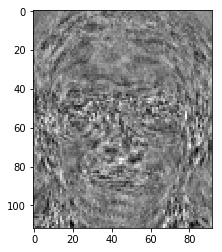

In [20]:
faces = U.reshape((112, 92, -1))
grid = visualize_grid(faces)
plt.gray()

plt.imshow(faces[:,:,0])
plt.show()

X_train_fisher = ff.project(X_train)
X_test_fisher = ff.project(X_test)

In [21]:
# knn with k = 1
knn_1 = K_nearest_neighbour()
knn_1.train(X_train_fisher, y_train)
test_predictions = knn_1.predict(X_test_fisher)
train_predictions = knn_1.predict(X_train_fisher)
train_accuracy = np.mean(train_predictions == y_train)
test_accuracy = np.mean(test_predictions == y_test)
print(f'training accuracy = {train_accuracy}')
print(f'testing accuracy = {test_accuracy}')

training accuracy = 1.0
testing accuracy = 0.76


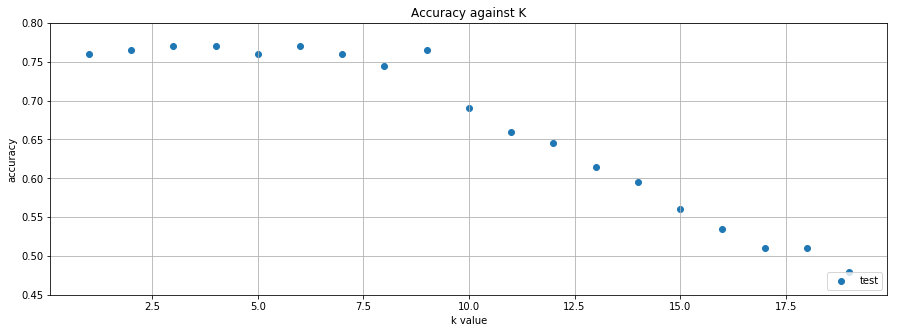

best k = 3, accuracy = 0.77


In [34]:
Ks = list(range(1,20,1))
train_accs, test_accs = [],[]

for k in Ks:
    knn = K_nearest_neighbour(k=k)
    knn.train(X_train_fisher, y_train)
    test_predictions = knn.predict(X_test_fisher)
    train_predictions = knn.predict(X_train_fisher)
    train_accs.append(np.mean(train_predictions == y_train))
    test_accs.append(np.mean(test_predictions == y_test))
    
plt.scatter(Ks,test_accs, label='test')
plt.legend(loc='lower right')
plt.title('Accuracy against K')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.gcf().set_size_inches(15,5)
plt.grid()
plt.show()
best_k = Ks[np.argmax(test_accs)]
print(f'best k = {best_k}, accuracy = {test_accs[best_k]}')